<a href="https://colab.research.google.com/github/DivyaDariniSivabalan/INTERNPROVE_DS_01/blob/main/Airway_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import files
u=files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
df=pd.read_csv("Tweets.csv")

In [ ]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

1. Data cleaning
2. EDA
3. Text Pre-Processing
4. Model building
5. Evaluation

1.DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.drop(columns = ['tweet_id','airline_sentiment_confidence','airline','name','retweet_count','tweet_created'],inplace = True)

In [ ]:
df.drop(columns=['negativereason_gold','tweet_coord','tweet_location','user_timezone','negativereason','airline_sentiment_gold','negativereason_confidence'],inplace = True)

In [ ]:
df.sample(6)

,airline_sentiment,text
5562,negative,"@SouthwestAir Your wifi stinks. I'm not mad, b..."
13209,neutral,@AmericanAir is 2513 and 1555 on time or Cance...
8787,negative,"@JetBlue understand that, but this policy of t..."
14224,negative,@AmericanAir why a different airport! I have n...
4531,negative,@SouthwestAir has become like every other airl...
1602,negative,"@united, there is no good word for describing ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['airline_sentiment'] = encoder.fit_transform(df['airline_sentiment'])
df.head(6)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
5,0,@VirginAmerica seriously would pay $30 a fligh...


2.EDA

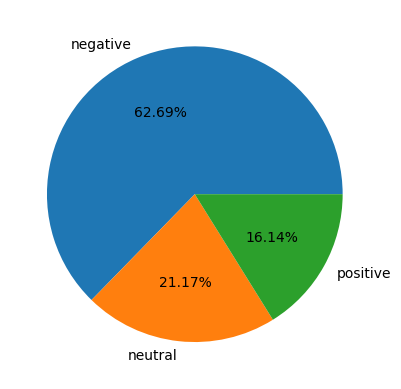

In [ ]:
plt.pie(df['airline_sentiment'].value_counts(),labels=['negative','neutral','positive'],autopct='%0.2f%%')
plt.show()

3.TEXT PRE-PROCESSING

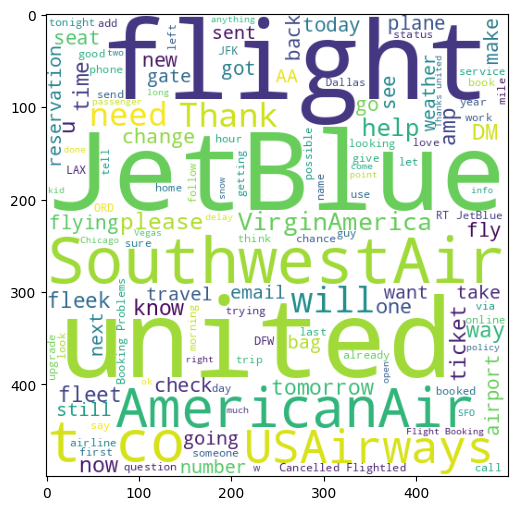

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
negative = wc.generate(df[df['airline_sentiment'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative)


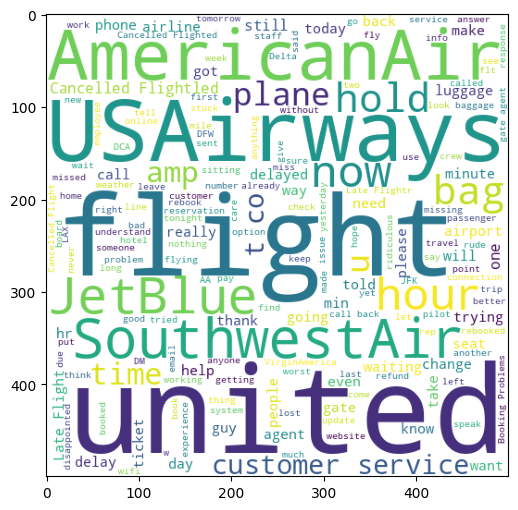

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
neutral = wc.generate(df[df['airline_sentiment'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(neutral)

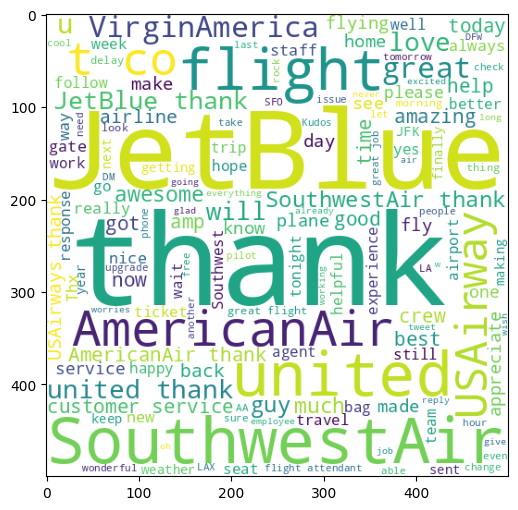

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive = wc.generate(df[df['airline_sentiment'] == 2]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive)

4. MODEL EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train = df.loc[:11711, 'text'].values
Y_train = df.loc[:11711, 'airline_sentiment'].values
X_test = df.loc[11712:, 'text'].values
Y_test = df.loc[11712:, 'airline_sentiment'].values

In [ ]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print("The shape of train vector is", train_vectors.shape)
print("The shape of test vector is", test_vectors.shape)

The shape of train vector is (11712, 13401)
The shape of test vector is (2928, 13401)


In [ ]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
svc = SVC()
clf = svc.fit(train_vectors, Y_train)
predicted = clf.predict(test_vectors)
print("Predicted result:", predicted)
print("Accuracy score from linear SVC model:", accuracy_score(Y_test, predicted))

Predicted result: [0 0 2 ... 0 0 0]
Accuracy score from linear SVC model: 0.8111338797814208
